In [1]:
!pip install yellowbrick


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler  
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [13]:
data = pd.read_csv('Dataset-tugas.csv')
data.head(10)

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
5,6,Perempuan,22,17,76
6,7,Perempuan,35,18,6
7,8,Perempuan,23,18,94
8,9,Laki,64,19,3
9,10,Perempuan,30,19,72


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

IDPelanggan                   0
Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDPelanggan,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
data['Kelamin'].value_counts()

Kelamin
Perempuan    112
Laki          88
Name: count, dtype: int64

In [10]:
data['Rating_pengeluaran (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [11]:
data.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


In [12]:
data.drop(columns='IDPelanggan', inplace=True)

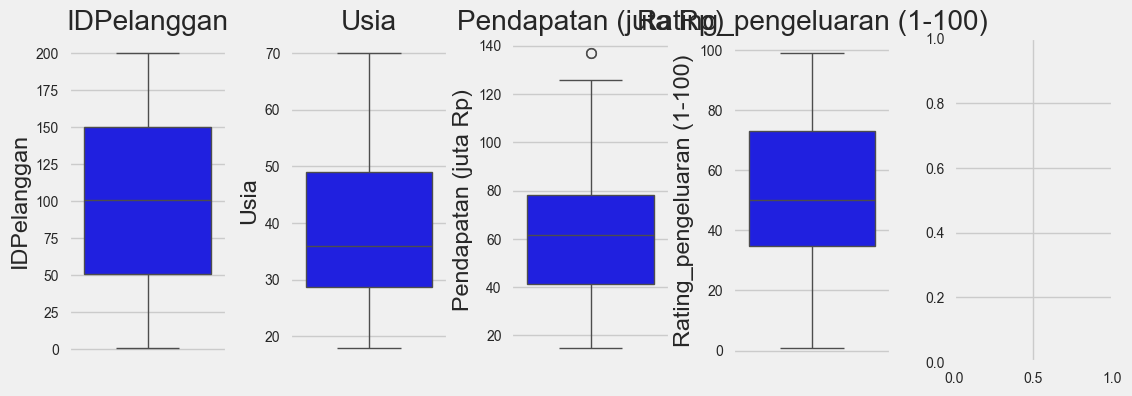

In [14]:
#pre-processing
def box_plot(data):
    #definisi variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns

    #buat figure dan axes untuk subplot dengan ukuran 1x3
    fig, axes = plt.subplots(1, 5, figsize=(12, 4)) #sesuaikan ukuran figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4) #atur jarak antar subplot 

    #iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="blue", ax=axes[i]) #perhatikan perubahan disini
        axes[i].set_title(var) #tambahkan judul untuk setiap plot

    #tampilkan plot
    plt.show()

#panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

Pada box plot diatas, dapat dijelaskan bahwa sebaran usia pelanggan terdistribusi cukup merata antara 20 hingga 70 tahun. ini menunjukkan produk atau jasa yang ditawarkan perusahaan menarik bagi berbagai rentang usia. selain itu, pendapatan pelanggan terdapat sejumlah kecil pelanggan dengan pendapatan yang jauh lebih tinggi sebesar 80 juta dari rata-rata yaitu 60 juta. sebagian besar pelanggan memiliki rating pengeluaran antara 40 hingga 80. Ini menunjukkan sebagian besar pelanggan memiliki tingkat pengeluaran yang hampir seimbang.

### Pre-Processing

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.        , 0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 1.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 1.        , 0.25      , 0.01639344, 0.39795918],
       [0.02512563, 1.        , 0.07692308, 0.01639344, 0.76530612],
       [0.03015075, 1.        , 0.32692308, 0.02459016, 0.05102041],
       [0.03517588, 1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.04020101, 0.        , 0.88461538, 0.03278689, 0.02040816],
       [0.04522613, 1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.05025126, 0.        , 0.94230769, 0.03278689, 0.13265306],
       [0.05527638, 1.        , 0.32692308, 0.03278689, 1.        ],
       [0.06030151, 1.        , 0.76923077, 0.04098361, 0.14285714],
       [0.06532663, 1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.07035176, 0.        , 0.

### Modelling

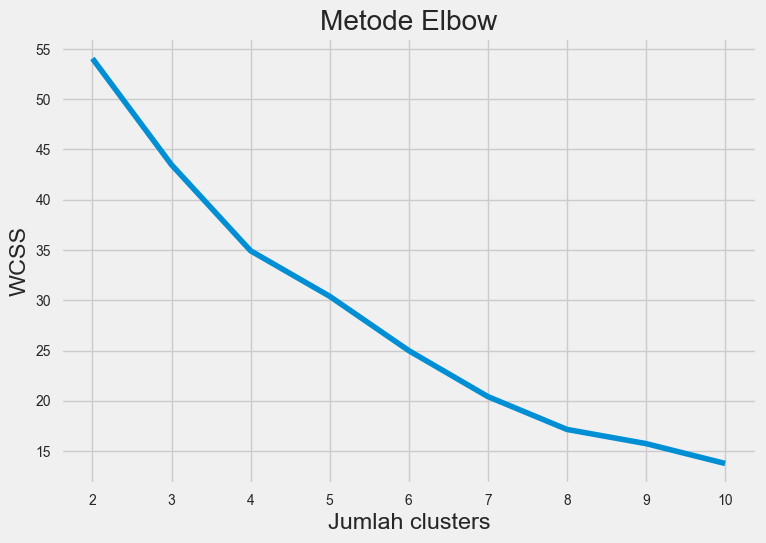

In [17]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# menjalakan K-means Clustering ke dataset
model1= KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred1=model1.fit_predict(X_scaled)

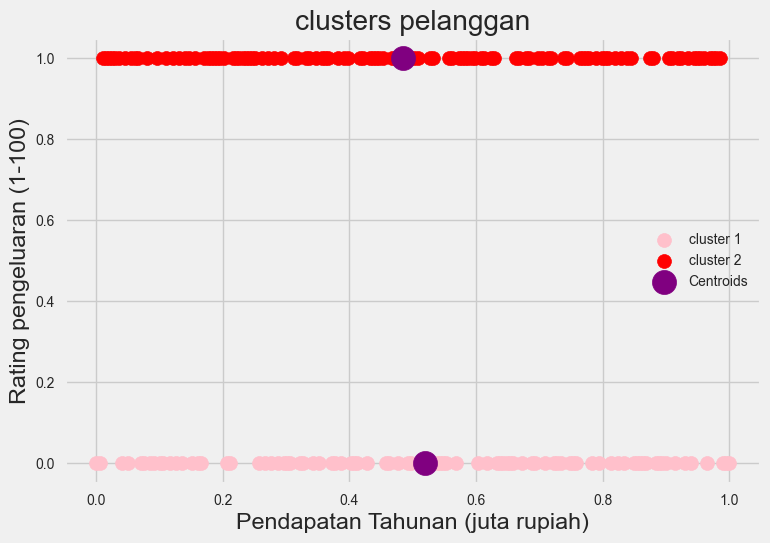

In [21]:
plt.scatter(X_scaled[y_pred1==0, 0], X_scaled[y_pred1==0, 1],
            s = 100, c = 'pink', label = "cluster 1")

plt.scatter(X_scaled[y_pred1==1, 0], X_scaled[y_pred1==1, 1],
            s = 100, c = 'red', label = "cluster 2")

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'purple', label = 'Centroids')

plt.title('clusters pelanggan')
plt.xlabel('Pendapatan Tahunan (juta rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

In [22]:
#membuat objek DBScan dengan parameter epsilon dan jumlah minimum sampel
model2=DBSCAN(eps=1, min_samples=5)
model2.fit(X_scaled)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [ ]:
data['hasil_cluster'] = model2.labels_
data.head(10)

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),hasil_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1
5,1,22,17,76,1
6,1,35,18,6,1
7,1,23,18,94,1
8,0,64,19,3,0
9,1,30,19,72,1


In [23]:
means = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred_3 = means.fit_predict(X_scaled)

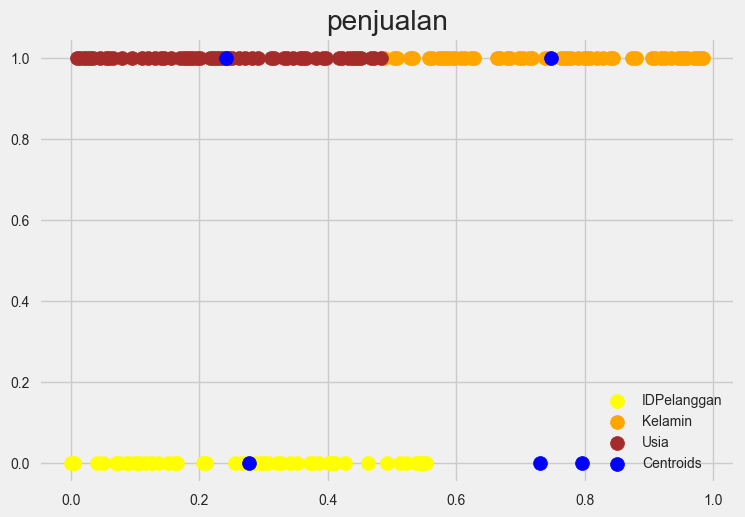

In [26]:
plt.scatter(X_scaled[y_pred_3 == 0, 0], X_scaled[y_pred_3 == 0, 1], s = 100, c = 'yellow', label = 'IDPelanggan')
plt.scatter(X_scaled[y_pred_3 == 1, 0], X_scaled[y_pred_3 == 1, 1], s = 100, c = 'orange', label = 'Kelamin')
plt.scatter(X_scaled[y_pred_3 == 2, 0], X_scaled[y_pred_3 == 2, 1], s = 100, c = 'brown', label = 'Usia')

plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')

plt.title('penjualan')
plt.legend()
plt.show()

In [27]:
#menghitung silhoutte_score algoritma k-means
evaluasi_kmeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette score: ", evaluasi_kmeans)

Silhouette score:  0.45157033770569127


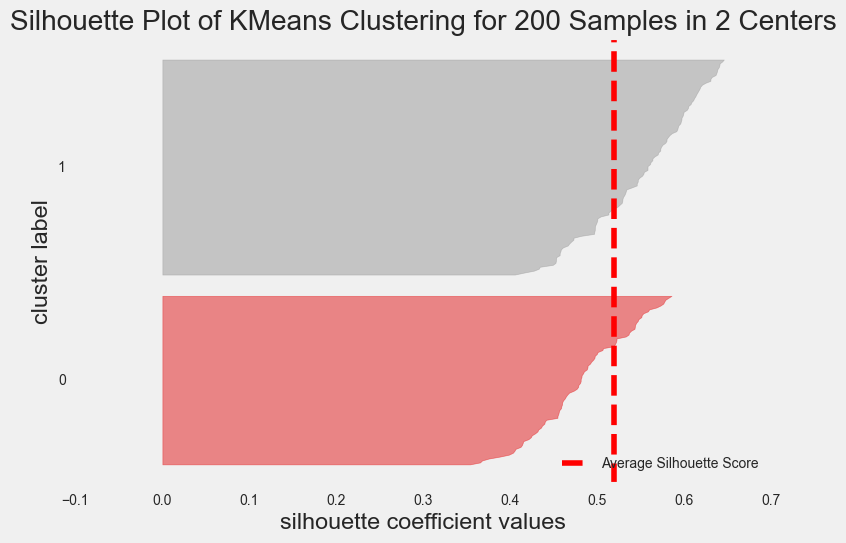

In [39]:
#membuat silhoutte visualisasi algoritma k-means 
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [40]:
#menghitung silhoutte_score algoritma k-means
evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print("Silhouette score: ", evaluasi_DBScan)

Silhouette score:  0.5194624832665107


In [41]:
# menghitung Davies-Bouldin Index (DBI) algoritma k-means 
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Boudin Index(DBI): ", dbi_score1)

Davies-Boudin Index(DBI):  0.8172534497318451


In [42]:
# menghitung Davies-Bouldin Index (DBI) algoritma k-means 
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Boudin Index(DBI): ", dbi_score2)

Davies-Boudin Index(DBI):  0.8172534497318451
